<h1>Battle of Neighborhoods - City of Vancouver</h1>
<h2>Open new Kid's Mall in the City</h2>

<h3>Web Scrapping</h3>

<h4><i>Importing libraries</i></h4>

In [1]:
# !conda install -c conda-forge folium=0.5.0 --yes

In [2]:
import requests
import os
import pandas as pd
import numpy as np
import json

from bs4 import BeautifulSoup

import matplotlib.cm as cm
import matplotlib.colors as colors
# import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [3]:
# retrieve the URL and create a BeautifulSoup object
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V'
bc_wiki = requests.get(url)
soup = BeautifulSoup(bc_wiki.content, "lxml")

table = soup.find_all('table')[0]
df = pd.read_html(str(table))
bc_data = pd.DataFrame(df[0])
bc_data.rename(columns={'Postcode': 'PostalCode', 'Borough': 'Borough', 'Neighbourhood': 'Neighborhood'}, inplace=True)
print(bc_data.shape)
bc_data.head()

(20, 9)


,0,1,2,3,4,5,6,7,8
0,V1AKimberley,V2APenticton,V3ALangley Township(Langley City),V4ASurreySouthwest,V5ABurnaby(Government Road / Lake City / SFU /...,V6AVancouver(Strathcona / Chinatown / Downtown...,V7ARichmondSouth,V8APowell River,V9AVictoria(Vic West / Esquimalt)Canadian Forc...
1,V1BVernonEast,V2BKamloopsNorthwest,V3BPort CoquitlamCentral,V4BWhite Rock,V5BBurnaby(Parkcrest-Aubrey / Ardingley-Sprott),V6BVancouver(NE Downtown / Gastown / Harbour C...,V7BRichmond(Sea Island / YVR),V8BSquamish,V9BVictoria(West Highlands / North Langford / ...
2,V1CCranbrook,V2CKamloopsCentral and Southeast,V3CPort CoquitlamSouth,V4CDeltaNortheast,V5CBurnaby(Burnaby Heights / Willingdon Height...,V6CVancouver(Waterfront / Coal Harbour / Canad...,V7CRichmondNorthwest,V8CKitimat,V9CVictoria(Colwood / South Langford / Metchosin)
3,V1ESalmon Arm,V2EKamloopsSouth and West,V3ECoquitlamNorth,V4EDeltaEast,V5EBurnaby(Lakeview-Mayfield / Richmond Park /...,V6EVancouver(SE West End / Davie Village),V7ERichmondSouthwest,V8EWhistler,V9EVictoria(East Highlands / NW Saanich)
4,V1GDawson Creek,V2GWilliams Lake,V3GAbbotsfordEast,V4GDeltaEast Central,V5GBurnaby(Cascade-Schou / Douglas-Gilpin),V6GVancouver(NW West End / Stanley Park),V7GNorth Vancouver (district municipality)Oute...,V8GTerrace,V9GLadysmith


In [4]:
### create one list for each column of bc_data
zero = bc_data[0].tolist()
one = bc_data[1].tolist()
two = bc_data[2].tolist()
three = bc_data[3].tolist()
four = bc_data[4].tolist()
five = bc_data[5].tolist()
six = bc_data[6].tolist()
seven = bc_data[7].tolist()
eight = bc_data[8].tolist()

In [5]:
### concatenate all lists and convert to pd.Series
bc_series = pd.Series([zero, one, two, three, four, five, six, seven, eight])
bc_series = bc_series.sum()
### convert Series to DataFrame
bc_df = pd.DataFrame(bc_series)
bc_df.head()

,0
0,V1AKimberley
1,V1BVernonEast
2,V1CCranbrook
3,V1ESalmon Arm
4,V1GDawson Creek


In [6]:
# split data into 2 columns: PostalCode, City-Neighborhood
bc_df['PostalCode'] = bc_df[0].str[:3]
bc_df['City-Neighborhood'] = bc_df[0].str[3:]
# bc_df.head(10)
bc_df.shape

(180, 3)

In [7]:
### create a subdf with Vancouver's data only
vancouver_df = bc_df[bc_df['City-Neighborhood'].str.startswith('Vancouver')]
print(vancouver_df.shape)
vancouver_df.head()

(31, 3)


,0,PostalCode,City-Neighborhood
87,V5KVancouver(North Hastings-Sunrise),V5K,Vancouver(North Hastings-Sunrise)
88,V5LVancouver(North Grandview-Woodland),V5L,Vancouver(North Grandview-Woodland)
89,V5MVancouver(South Hastings-Sunrise / North Re...,V5M,Vancouver(South Hastings-Sunrise / North Renfr...
90,V5NVancouver(South Grandview-Woodland / NE Ken...,V5N,Vancouver(South Grandview-Woodland / NE Kensin...
91,V5PVancouver(SE Kensington-Cedar Cottage / Vic...,V5P,Vancouver(SE Kensington-Cedar Cottage / Victor...


In [8]:
# split City-Neighborhood into 2 columns, named City and Neighborhood
vancouver_df[['City', 'Neighborhood']] = vancouver_df['City-Neighborhood'].str.split('(', expand=True)
# remove the ending ')' from 'Neighborhood' column
vancouver_df['Neighborhood'] = vancouver_df['Neighborhood'].str[:-1]
# drop columns with repeated data
vancouver_df.drop(columns=[0, 'City-Neighborhood'], inplace=True)
vancouver_df.head()

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

,PostalCode,City,Neighborhood
87,V5K,Vancouver,North Hastings-Sunrise
88,V5L,Vancouver,North Grandview-Woodland
89,V5M,Vancouver,South Hastings-Sunrise / North Renfrew-Colling...
90,V5N,Vancouver,South Grandview-Woodland / NE Kensington-Cedar...
91,V5P,Vancouver,SE Kensington-Cedar Cottage / Victoria-Fraserview


In [9]:
vancouver_data = vancouver_df.copy()
vancouver_data.reset_index(drop=True, inplace=True)

<h4><i>Web scrapping is successful and data cleaning is done. Data is saved to a .csv file</i></h4>

In [ ]:
# save vancouver_data to .csv
# vancouver_data.to_csv('Vancouver_data.csv', index=False)

vancouver_data = pd.read_csv('Vancouver_data.csv') # RUN FROM HERE
vancouver_data.head()

<h4><i>Location co-ordinates are obtained using Geocoder</i></h4>

In [ ]:
# !pip install geocoder
# !pip install geopy
import geocoder
from geopy.geocoders import Nominatim
print('done')

In [12]:
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Vancouver, British Columbia'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords
get_latilong('V5N')

[49.25442000000004, -123.06679999999994]

In [13]:
vancouver_data = vancouver_data.dropna()

In [14]:
vancouver_data.shape

(31, 3)

In [15]:
postal_codes = vancouver_data['PostalCode']    
coords = [ get_latilong(postal_code) for postal_code in postal_codes.tolist() ]

In [16]:
# Adding Columns Latitude & Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
vancouver_data['Latitude'] = df_coords['Latitude']
vancouver_data['Longitude'] = df_coords['Longitude']

In [17]:
vancouver_data.head()

,PostalCode,City,Neighborhood,Latitude,Longitude
0,V5K,Vancouver,North Hastings-Sunrise,49.28167,-123.03998
1,V5L,Vancouver,North Grandview-Woodland,49.28070,-123.06684
2,V5M,Vancouver,South Hastings-Sunrise / North Renfrew-Colling...,49.26043,-123.04009
3,V5N,Vancouver,South Grandview-Woodland / NE Kensington-Cedar...,49.25442,-123.06680
4,V5P,Vancouver,SE Kensington-Cedar Cottage / Victoria-Fraserview,49.22293,-123.06688


In [18]:
vancouver_data['Neighborhood'] = vancouver_data['Neighborhood'].str.replace('/',',')

<h4><i>Creation of a new dataframe with latitude, longitude values is completed</i></h4>

In [19]:
vancouver_data.head()

,PostalCode,City,Neighborhood,Latitude,Longitude
0,V5K,Vancouver,North Hastings-Sunrise,49.28167,-123.03998
1,V5L,Vancouver,North Grandview-Woodland,49.28070,-123.06684
2,V5M,Vancouver,"South Hastings-Sunrise , North Renfrew-Colling...",49.26043,-123.04009
3,V5N,Vancouver,"South Grandview-Woodland , NE Kensington-Cedar...",49.25442,-123.06680
4,V5P,Vancouver,"SE Kensington-Cedar Cottage , Victoria-Fraserview",49.22293,-123.06688


In [20]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Vancouver, BC, Canada'
geolocator = Nominatim(user_agent="vancouver_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of the city of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of the city of Vancouver are 49.2608724, -123.1139529.


In [21]:
# !pip install folium
import folium

In [22]:
# create map of Vancouver using latitude and longitude values
map_vancouver = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(vancouver_data['Latitude'], 
                                  vancouver_data['Longitude'],
                                  vancouver_data['Neighborhood']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='lightgreen',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vancouver)

map_vancouver

<h4><i>A map is visualized for all postal codes of Vancouver using Folium library. Map might not be visible on Github, please refer the report</i></h4>

<h3>Work with Foursquare API</h3>

In [23]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'MC1XUNBCS2QZNRPAWUYNK3HPIIUO5EZCTGIGXY5UQPLE5TAY' # your Foursquare ID
CLIENT_SECRET = 'FHPF3SBXTPVJUTT0S2XWWU2I0LXDCPEVHNWYEGA3GTTWAX0X' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

<h4><i>Get nearby venues using Foursquare API</i></h4>

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    """ names, latitudes, longitudes are columns from a dataframe. """
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                  'Neighborhood Latitude',
                  'Neighborhood Longitude',
                  'Venue',
                  'Venue Latitude',
                  'Venue Longitude',
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
vancouver_venues = getNearbyVenues(names=vancouver_data['Neighborhood'],
                            latitudes=vancouver_data['Latitude'],
                            longitudes=vancouver_data['Longitude'])

North Hastings-Sunrise
North Grandview-Woodland
South Hastings-Sunrise , North Renfrew-Collingwood
South Grandview-Woodland , NE Kensington-Cedar Cottage
SE Kensington-Cedar Cottage , Victoria-Fraserview
South Renfrew-Collingwood
Killarney
East Mount Pleasant
West Kensington-Cedar Cottage , NE Riley Park-Little Mountain
SE Riley Park-Little Mountain , SW Kensington-Cedar Cottage , NE Oakridge , North Sunset
SE Oakridge , East Marpole , South Sunset
West Mount Pleasant , West Riley Park-Little Mountain
East Fairview , South Cambie
Strathcona , Chinatown , Downtown Eastside
NE Downtown , Gastown , Harbour Centre , International Village , Victory Square , Yaletown
Waterfront , Coal Harbour , Canada Place
SE West End , Davie Village
NW West End , Stanley Park
West Fairview , Granville Island , NE Shaughnessy
NW Shaughnessy , East Kitsilano , Quilchena
Central Kitsilano , Greektown
NW Arbutus Ridge , NE Dunbar-Southlands
South Shaughnessy , NW Oakridge , NE Kerrisdale , SE Arbutus Ridge
Wes

<h4><i>Vancouver venues are saved to a .csv file</i></h4>

In [26]:
# vancouver_venues.to_csv('Vancouver_venues.csv', index=False)
vancouver_venues = pd.read_csv('Vancouver_venues.csv')

print(vancouver_venues.shape)
# vancouver_venues.head() 
leng = len(vancouver_venues['Venue Category'].unique()) #unique venues

(2039, 7)


236

<h4><i>Let's check how many venues were returned for each neighborhood</i></h4>

In [27]:
pd.set_option('display.max_rows', None)
vancouver_venues_grouped = vancouver_venues.groupby('Neighborhood').count().reset_index()
vancouver_venues_grouped = vancouver_venues_grouped.sort_values('Venue', ascending=False)
vancouver_venues_grouped

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bentall Centre,100,100,100,100,100,100
9,"NW West End , Stanley Park",100,100,100,100,100,100
27,"West Kensington-Cedar Cottage , NE Riley Park-...",100,100,100,100,100,100
25,"Waterfront , Coal Harbour , Canada Place",100,100,100,100,100,100
18,SW Downtown,100,100,100,100,100,100
17,"SE West End , Davie Village",100,100,100,100,100,100
1,"Central Kitsilano , Greektown",100,100,100,100,100,100
12,Pacific Centre,100,100,100,100,100,100
30,"West Mount Pleasant , West Riley Park-Little M...",100,100,100,100,100,100
3,East Mount Pleasant,100,100,100,100,100,100


<h4><i>Plot number of venues vs neighborhoods</i></h4>

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))

ax = sns.barplot(x='Venue', y='Neighborhood', data=vancouver_venues_grouped)
ax.set_xlabel('Number of Venues')
ax.set_ylabel('Neighborhoods')

Text(0,0.5,'Neighborhoods')

In [29]:
#Venues of our interest
print (vancouver_venues.loc[vancouver_venues['Venue Category']==('Park'), ['Venue Category']].drop_duplicates())
print("\n")
print (vancouver_venues.loc[vancouver_venues['Venue Category'].str.contains('Garden') | vancouver_venues['Venue Category'].str.contains('Playground') | vancouver_venues['Venue Category'].str.contains('Game Store'), ['Venue Category']].drop_duplicates())

  Venue Category
7           Park


       Venue Category
90   Toy / Game Store
609            Garden
698        Playground


In [30]:
### assign color 'red' to 'my_categories' and 'blue' to all other categories
# create a list with the names of the relevant categories for my analysis
my_categories = ['Park', 'Toy / Game Store', 'Garden', 'Playground']
# get their indexes from vancouver_venues
i_list = vancouver_venues.index[vancouver_venues['Venue Category'].isin(my_categories)].tolist()
# create a list of all Venue Categories
all_categories = list(vancouver_venues['Venue Category'])

colors = []
for i in range(len(all_categories)):
    if i in i_list:
        colors.append('red')
    else:
        colors.append('blue')

In [31]:
# add 'MarkerColor' to the dataframe vancouver_venues
vancouver_venues['MarkerColor'] = colors
vancouver_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,MarkerColor
0,North Hastings-Sunrise,49.28167,-123.03998,The Fair at the PNE,49.282971,-123.042109,Fair,blue
1,North Hastings-Sunrise,49.28167,-123.03998,Tamam Fine Palestinian Cuisine,49.281070,-123.051438,Middle Eastern Restaurant,blue
2,North Hastings-Sunrise,49.28167,-123.03998,Hastings Liquor Store,49.281183,-123.047431,Liquor Store,blue
3,North Hastings-Sunrise,49.28167,-123.03998,Bao Chau,49.281232,-123.048971,Vietnamese Restaurant,blue
4,North Hastings-Sunrise,49.28167,-123.03998,Hastings Community Centre,49.280778,-123.039176,Event Space,blue


In [32]:
# create map of Vancouver using latitude and longitude values
map_venues = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, venue, venue_cat, markercolor in zip(vancouver_venues['Venue Latitude'],
                                                   vancouver_venues['Venue Longitude'],
                                                   vancouver_venues['Venue'],
                                                   vancouver_venues['Venue Category'],
                                                   vancouver_venues['MarkerColor'],
                                            ):
    label = '{}, {}'.format(venue, venue_cat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=markercolor,
        fill=True,
        fill_color=markercolor,
        fill_opacity=0.2,
        parse_html=False).add_to(map_venues)

map_venues

<h4>Convert categorical data into numerical by one hot encoding. This will give the frequency of each venues in each neighborhood</h4>

In [ ]:
#one hot encoding
vancouver_onehot = pd.get_dummies(vancouver_venues[['Venue Category']], prefix="", prefix_sep="")
vancouver_onehot.head()

In [34]:
kidstore_onehot = vancouver_onehot[['Park', 'Toy / Game Store', 'Garden', 'Playground']]
kidstore_onehot.head()

,Park,Toy / Game Store,Garden,Playground
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [35]:
# add neighborhood column  to dataframe
kidstore_onehot['Neighborhood'] = vancouver_venues['Neighborhood']
kidstore_onehot.head()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Park,Toy / Game Store,Garden,Playground,Neighborhood
0,0,0,0,0,North Hastings-Sunrise
1,0,0,0,0,North Hastings-Sunrise
2,0,0,0,0,North Hastings-Sunrise
3,0,0,0,0,North Hastings-Sunrise
4,0,0,0,0,North Hastings-Sunrise


In [36]:
#Shift Neighborhood column to first
cols = kidstore_onehot.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols

['Neighborhood', 'Park', 'Toy / Game Store', 'Garden', 'Playground']

In [37]:
kidstore_onehot = kidstore_onehot[cols]
kidstore_onehot = kidstore_onehot.copy()
kidstore_onehot.head()

,Neighborhood,Park,Toy / Game Store,Garden,Playground
0,North Hastings-Sunrise,0,0,0,0
1,North Hastings-Sunrise,0,0,0,0
2,North Hastings-Sunrise,0,0,0,0
3,North Hastings-Sunrise,0,0,0,0
4,North Hastings-Sunrise,0,0,0,0


In [38]:
kidstore_onehot.shape

(2039, 5)

<h3><i>Group the neighborhod by taking mean of  frequency of occurrence of each category</i></h3>

In [ ]:
kidstore_grouped = kidstore_onehot.groupby('Neighborhood').mean().reset_index()
kidstore_grouped

<h2>Cluster Neighborhoods</h2>

Elbow Method to determine the optimal value of k

In [40]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [41]:
Kidstore_grouped_clustering = kidstore_grouped.drop('Neighborhood', 1)
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(Kidstore_grouped_clustering)
    kmeanModel.fit(Kidstore_grouped_clustering)
 
    distortions.append(sum(np.min(cdist(Kidstore_grouped_clustering, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / Kidstore_grouped_clustering.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(Kidstore_grouped_clustering, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / Kidstore_grouped_clustering.shape[0]
    mapping2[k] = kmeanModel.inertia_

Tabulating and Visualizing the results:

In [42]:
# Using the different values of Distortion:
print("values of Distortion")
for key, val in mapping1.items():
    print(f'{key} : {val}')

# Using the different values of Inertia:
print("\n values of Inertia")
for key, val in mapping2.items():
    print(f'{key} : {val}')

values of Distortion
1 : 0.024805523431608103
2 : 0.018211755507803334
3 : 0.012753407946464788
4 : 0.00908088382231599
5 : 0.008124884722539992
6 : 0.006501659961579954
7 : 0.005552872467183401
8 : 0.004821167068485118
9 : 0.004235884678601382

 values of Inertia
1 : 0.03188471645085693
2 : 0.014663617524056295
3 : 0.006389107940164776
4 : 0.0033648618436125577
5 : 0.002508329374071999
6 : 0.0017851954335572418
7 : 0.0013737498692449335
8 : 0.0011164936334172688
9 : 0.0008556593559063216


<h3><i>Elbow method to determine optimal value of K</i></h3>

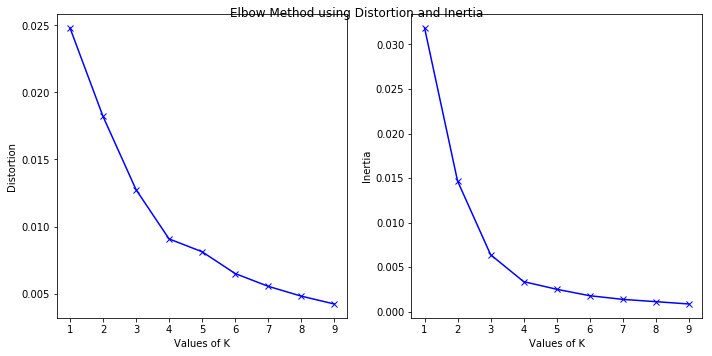

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Elbow Method using Distortion and Inertia')

ax1.plot(K, distortions, 'bx-')
ax1.set(xlabel='Values of K', ylabel='Distortion')

ax2.plot(K, inertias, 'bx-')
ax2.set(xlabel='Values of K', ylabel='Inertia')
fig.tight_layout()

In [44]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Kidstore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 2, 1, 0, 1, 0, 0, 1, 1])

In [45]:
# add cluster labels column
kidstore_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

kidstore_merged = vancouver_data
# kidstore_grouped.head()

# merge dataframes to add latitude/longitude for each neighborhood
kidstore_merged = kidstore_merged.join(kidstore_grouped.set_index('Neighborhood'), on='Neighborhood')

In [46]:
kidstore_merged

,PostalCode,City,Neighborhood,Latitude,Longitude,Cluster Labels,Park,Toy / Game Store,Garden,Playground
0,V5K,Vancouver,North Hastings-Sunrise,49.28167,-123.03998,3,0.080000,0.000000,0.00000,0.000000
1,V5L,Vancouver,North Grandview-Woodland,49.28070,-123.06684,1,0.000000,0.011111,0.00000,0.000000
2,V5M,Vancouver,"South Hastings-Sunrise , North Renfrew-Colling...",49.26043,-123.04009,3,0.051282,0.000000,0.00000,0.000000
3,V5N,Vancouver,"South Grandview-Woodland , NE Kensington-Cedar...",49.25442,-123.06680,0,0.037037,0.000000,0.00000,0.000000
4,V5P,Vancouver,"SE Kensington-Cedar Cottage , Victoria-Fraserview",49.22293,-123.06688,1,0.000000,0.000000,0.00000,0.000000
5,V5R,Vancouver,South Renfrew-Collingwood,49.23996,-123.04113,3,0.062500,0.000000,0.00000,0.000000
6,V5S,Vancouver,Killarney,49.21537,-123.04112,0,0.038462,0.000000,0.00000,0.000000
7,V5T,Vancouver,East Mount Pleasant,49.26297,-123.09165,1,0.000000,0.000000,0.00000,0.000000
8,V5V,Vancouver,"West Kensington-Cedar Cottage , NE Riley Park-...",49.24843,-123.09056,1,0.000000,0.000000,0.00000,0.000000
9,V5W,Vancouver,"SE Riley Park-Little Mountain , SW Kensington-...",49.23201,-123.09139,0,0.023810,0.000000,0.00000,0.000000


In [47]:
kidstore_merged['Cluster Labels'].unique()

array([3, 1, 0, 2], dtype=int64)

In [48]:
labels = list(kidstore_merged['Cluster Labels'])

marker_color = [] 
for label in labels:
    if label == 0:
        marker_color.append('blue')
    elif label == 1:
        marker_color.append('yellow')
    elif label == 2:
        marker_color.append('red')
    elif label == 3:
        marker_color.append('purple')
# add colors to df in a new column     
kidstore_merged['MarkerColor'] = marker_color
kidstore_merged.head()

,PostalCode,City,Neighborhood,Latitude,Longitude,Cluster Labels,Park,Toy / Game Store,Garden,Playground,MarkerColor
0,V5K,Vancouver,North Hastings-Sunrise,49.28167,-123.03998,3,0.080000,0.000000,0.0,0.0,purple
1,V5L,Vancouver,North Grandview-Woodland,49.28070,-123.06684,1,0.000000,0.011111,0.0,0.0,yellow
2,V5M,Vancouver,"South Hastings-Sunrise , North Renfrew-Colling...",49.26043,-123.04009,3,0.051282,0.000000,0.0,0.0,purple
3,V5N,Vancouver,"South Grandview-Woodland , NE Kensington-Cedar...",49.25442,-123.06680,0,0.037037,0.000000,0.0,0.0,blue
4,V5P,Vancouver,"SE Kensington-Cedar Cottage , Victoria-Fraserview",49.22293,-123.06688,1,0.000000,0.000000,0.0,0.0,yellow


In [49]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood, markercolor in zip(kidstore_merged['Latitude'],
                                               kidstore_merged['Longitude'],
                                               kidstore_merged['Neighborhood'],
                                               kidstore_merged['MarkerColor']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=markercolor,
        fill=True,
        fill_color=markercolor,
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)

map_clusters

<h2>Analysis</h2>

<h3>Examine Clusters</h3>

In [50]:
### Wrangle data to create a new df according to what seaborn requires to make a barplot
# create subdf
subdf_kidstore_merged = kidstore_merged[['Cluster Labels', 'Park', 'Toy / Game Store', 'Garden', 'Playground']]
# subdf_kidstore_merged.head()
# use df.melt to rearrange data before plotting
data = subdf_kidstore_merged.melt('Cluster Labels', var_name='Place', value_name='Frequencies')

Text(0.5,1,'Frequency of Venues per Cluster')

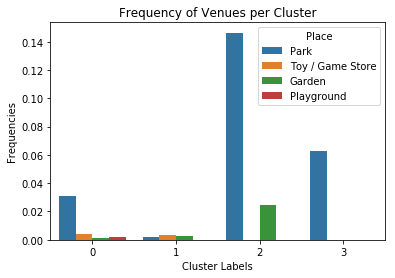

In [51]:
# avg number venues vs cluster
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x="Cluster Labels", y="Frequencies", hue="Place", data=data, ci=None)
ax.set_title("Frequency of Venues per Cluster")

Cluster0: has all types of venues but less in count as compared to Cluster2 and Cluster3.
<br>
Cluster1: has no playground and has the lowest counts of venues compared to the rest.
<br>Cluster2: has the most number of Parks and Garden, but no existing toy store and playground. Also Cluster 2 has only 1 postal code as mentioned earlier. We’ll check in detail for that particular postal code.
<br>Cluster3: has moderate number of parks but no other venue type.


In [52]:
# Create a subdf from vancouver_venues with only 'Kids store related' venue categories in it
my_categories = vancouver_venues[vancouver_venues['MarkerColor'] == 'red']
my_categories = my_categories[['Neighborhood', 'Venue', 'Venue Category', 'Venue Latitude', 'Venue Longitude']]
my_categories.head()

,Neighborhood,Venue,Venue Category,Venue Latitude,Venue Longitude
7,North Hastings-Sunrise,New Brighton Park,Park,49.289614,-123.038484
8,North Hastings-Sunrise,Hastings Park,Park,49.281020,-123.042785
41,North Hastings-Sunrise,Callister Park,Park,49.285471,-123.045984
44,North Hastings-Sunrise,Best Western Exhibition Park,Park,49.281218,-123.029255
90,North Grandview-Woodland,Dilly Dally,Toy / Game Store,49.274205,-123.069599


In [53]:
neighborh_68 = list(my_categories['Neighborhood']) # 68 items
clusters_31 = list(kidstore_merged['Cluster Labels']) # 31 items
neighborh_31 = list(kidstore_merged['Neighborhood'])  # 31 items
clusters_68 = []
for n in neighborh_68:
    i = neighborh_31.index(n)
    cluster = clusters_31[i]
    clusters_68.append(cluster)
# check clusters_68 length
len(clusters_68)

68

In [54]:
# add new column to 'my_categories'
my_categories['Cluster Labels'] = clusters_68
# add another column with a value of 1 in each row named 'Number of Venues'
num_venues = [1 for x in range(68)]
my_categories['Number of Venues'] = num_venues
print(my_categories.shape)
my_categories.head() 

(68, 7)


,Neighborhood,Venue,Venue Category,Venue Latitude,Venue Longitude,Cluster Labels,Number of Venues
7,North Hastings-Sunrise,New Brighton Park,Park,49.289614,-123.038484,3,1
8,North Hastings-Sunrise,Hastings Park,Park,49.281020,-123.042785,3,1
41,North Hastings-Sunrise,Callister Park,Park,49.285471,-123.045984,3,1
44,North Hastings-Sunrise,Best Western Exhibition Park,Park,49.281218,-123.029255,3,1
90,North Grandview-Woodland,Dilly Dally,Toy / Game Store,49.274205,-123.069599,1,1


In [55]:
# create pivot table to check how many 'Kids store related' venues are present in each cluster.
table = pd.pivot_table(my_categories, values='Number of Venues', 
                       index=['Cluster Labels', 'Neighborhood'], 
                       columns=['Venue Category'], 
                       aggfunc=np.sum).fillna(0)
pd.set_option('display.max_rows', None)
table

Venue Category                                                     Garden  \
Cluster Labels Neighborhood                                                 
0              Bentall Centre                                         0.0   
               Killarney                                              0.0   
               NW Arbutus Ridge , NE Dunbar-Southlands                0.0   
               NW Dunbar-Southlands , Chaldecutt , South Unive...     0.0   
               Pacific Centre                                         0.0   
               SE Oakridge , East Marpole , South Sunset              0.0   
               SE Riley Park-Little Mountain , SW Kensington-C...     0.0   
               SE West End , Davie Village                            0.0   
               SW Downtown                                            0.0   
               South Grandview-Woodland , NE Kensington-Cedar ...     0.0   
               Strathcona , Chinatown , Downtown Eastside             0.0   
               UBC                                                    0.0   
               Waterfront , Coal Harbour , Canada Place               0.0   
               West Mount Pleasant , West Riley Park-Little Mo...     2.0   
1              Central Kitsilano , Greektown                          0.0   
               NE Downtown , Gastown , Harbour Centre , Intern...     0.0   
               NW West End , Stanley Park                             0.0   
               North Grandview-Woodland                               0.0   
               South Shaughnessy , NW Oakridge , NE Kerrisdale...     1.0   
2              East Fairview , South Cambie                           1.0   
3              North Hastings-Sunrise                                 0.0   
               SE Kerrisdale , SW Oakridge , West Marpole             0.0   
               South Hastings-Sunrise , North Renfrew-Collingwood     0.0   
               South Renfrew-Collingwood                              0.0   
               West Fairview , Granville Island , NE Shaughnessy      0.0   
               West Kitsilano , West Point Grey , Jericho             0.0   

Venue Category                                                     Park  \
Cluster Labels Neighborhood                                               
0              Bentall Centre                                       2.0   
               Killarney                                            1.0   
               NW Arbutus Ridge , NE Dunbar-Southlands              1.0   
               NW Dunbar-Southlands , Chaldecutt , South Unive...   1.0   
               Pacific Centre                                       4.0   
               SE Oakridge , East Marpole , South Sunset            1.0   
               SE Riley Park-Little Mountain , SW Kensington-C...   1.0   
               SE West End , Davie Village                          3.0   
               SW Downtown                                          2.0   
               South Grandview-Woodland , NE Kensington-Cedar ...   2.0   
               Strathcona , Chinatown , Downtown Eastside           3.0   
               UBC                                                  2.0   
               Waterfront , Coal Harbour , Canada Place             2.0   
               West Mount Pleasant , West Riley Park-Little Mo...   2.0   
1              Central Kitsilano , Greektown                        1.0   
               NE Downtown , Gastown , Harbour Centre , Intern...   0.0   
               NW West End , Stanley Park                           1.0   
               North Grandview-Woodland                             0.0   
               South Shaughnessy , NW Oakridge , NE Kerrisdale...   0.0   
2              East Fairview , South Cambie                         6.0   
3              North Hastings-Sunrise                               4.0   
               SE Kerrisdale , SW Oakridge , West Marpole           2.0   
               South Hastings-Sunrise , Nor

In [56]:
table_reseted = table.reset_index()

In [139]:
# find postal codes for each neighborhood in table_reseted
postal_codes = list(vancouver_data['PostalCode']) # 31 items
hoods = list(vancouver_data['Neighborhood']) # 31 items
hoods_table = list(table_reseted['Neighborhood']) # 26 items

postal_codes_26 = []
for hood in hoods_table:
    i = hoods.index(hood)
    p_code = postal_codes[i]
    postal_codes_26.append(p_code)
    
table_reseted['PostalCode'] = postal_codes_26
table_reseted.head()

Venue Category,Cluster Labels,Neighborhood,Garden,Park,Playground,Toy / Game Store,PostalCode
0,0,Bentall Centre,0.0,2.0,0.0,1.0,V7X
1,0,Killarney,0.0,1.0,0.0,0.0,V5S
2,0,"NW Arbutus Ridge , NE Dunbar-Southlands",0.0,1.0,0.0,0.0,V6L
3,0,"NW Dunbar-Southlands , Chaldecutt , South Univ...",0.0,1.0,0.0,0.0,V6S
4,0,Pacific Centre,0.0,4.0,0.0,1.0,V7Y


In [58]:
# create subdataframes to plot each cluster independently
table_reseted_0 = table_reseted[table_reseted['Cluster Labels'] == 0]
table_reseted_1 = table_reseted[table_reseted['Cluster Labels'] == 1]
table_reseted_2 = table_reseted[table_reseted['Cluster Labels'] == 2]
table_reseted_3 = table_reseted[table_reseted['Cluster Labels'] == 3]

df_0 = pd.melt(table_reseted_0, 
             id_vars='PostalCode',
             value_vars=['Park', 'Toy / Game Store', 'Garden', 'Playground'], 
             var_name='Venue Category',
             value_name='Number')
df_1 = pd.melt(table_reseted_1, 
             id_vars='PostalCode',
             value_vars=['Park', 'Toy / Game Store', 'Garden', 'Playground'], 
             var_name='Venue Category',
             value_name='Number')
df_2 = pd.melt(table_reseted_2, 
             id_vars='PostalCode',
             value_vars=['Park', 'Toy / Game Store', 'Garden', 'Playground'], 
             var_name='Venue Category',
             value_name='Number')
df_3 = pd.melt(table_reseted_3, 
             id_vars='PostalCode',
             value_vars=['Park', 'Toy / Game Store', 'Garden', 'Playground'], 
             var_name='Venue Category',
             value_name='Number')

Text(0.5,1,'Venues per Postal Code Area - Cluster 0')

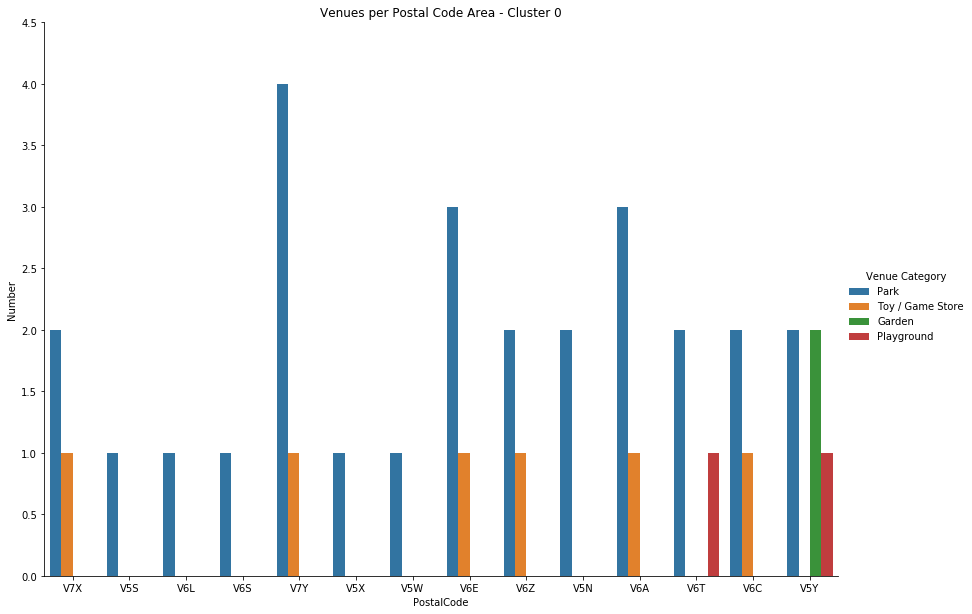

In [82]:
# plot Number of kids related venues per Postal Code for Cluster 0
ax_0 = sns.catplot(x='PostalCode', y='Number', hue='Venue Category', data=df_0, kind='bar', height=8.27, aspect=11.7/8.27)
ax_0.set(ylim=(0, 4.5))
plt.title('Venues per Postal Code Area - Cluster 0')

Result after examining Venues per Postal code- Cluster0<br>
If we check in Figure3(Venues per Postal code area- Cluster0) <br>The postal code V5Y seems to be a good choice to open a new Kids mall as the number of Parks, Garden is moderate; also has a playground and no kids store.


Text(0.5,1,'Venues per Postal Code Area - Cluster 1')

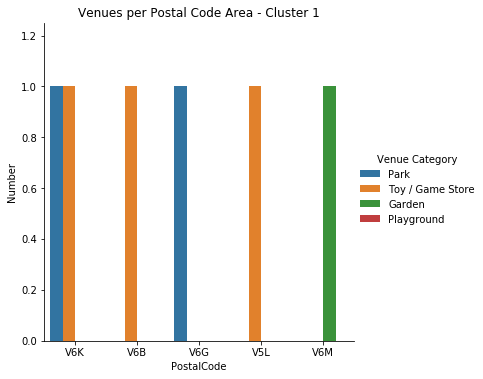

In [67]:
# plot Number of kids related venues per Postal Code for Cluster 1
ax_1 = sns.catplot(x='PostalCode', y='Number', hue='Venue Category', data=df_1, kind='bar')
ax_1.set(ylim=(0, 1.25))
plt.title('Venues per Postal Code Area - Cluster 1')

Result after examining Venues per Postal code- Cluster1<br>
In Cluster1, there are 3 toy stores in 3 different postal code areas.<br> Postal code V6G, V6M seems to be better choice than the rest for open a Kids mall as there is at least 1 park/garden to attract kids and no other toy store in competition.


Text(0.5,1,'Venues per Postal Code Area - Cluster 2')

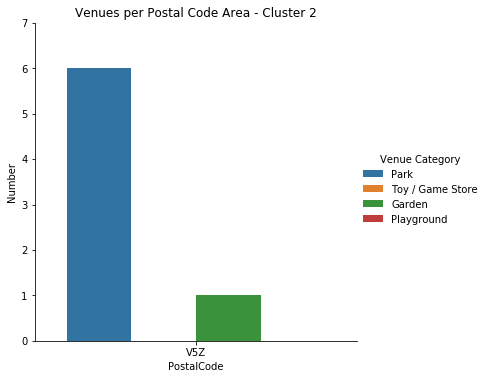

In [79]:
# plot Number of kids related venues per Postal Code for Cluster 2
ax_2 = sns.catplot(x='PostalCode', y='Number', hue='Venue Category', data=df_2, kind='bar')
ax_2.set(ylim=(0, 7))
plt.title('Venues per Postal Code Area - Cluster 2')

Result after examining Venues per Postal code- Cluster2<br>
V5Z seems to be a good choice to open a kids store nearby as the number of parks is 6 and garden 1 with no existing toy store.


Text(0.5,1,'Venues per Postal Code Area - Cluster 3')

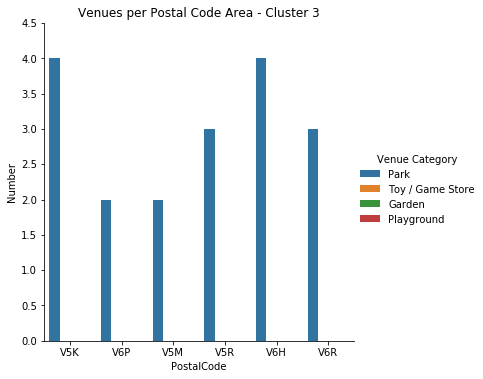

In [80]:
# plot Number of kids related venues per Postal Code for Cluster 3
ax_3 = sns.catplot(x='PostalCode', y='Number', hue='Venue Category', data=df_3, kind='bar')
ax_3.set(ylim=(0, 4.5))
plt.title('Venues per Postal Code Area - Cluster 3')

Result after examining Venues per Postal code- Cluster3<br>
V5K and V6H have high number of parks in the Cluster and no existing toy store. Can be considered as a option to open.


<h3>Visualize map with Venue types- Park, Playground, Garden, Toy / Game Store distributed over Vancouver City. </h3>

In [84]:
labels = list(my_categories['Venue Category'])

marker_color = [] 
for label in labels:
    if label == 'Park':
        marker_color.append('red')
    elif label == 'Toy / Game Store':
        marker_color.append('yellow')
    elif label == 'Garden':
        marker_color.append('green')
    elif label == 'Playground':
        marker_color.append('blue')
# add colors to df in a new column     
my_categories['MarkerColor'] = marker_color
my_categories.head()

,Neighborhood,Venue,Venue Category,Venue Latitude,Venue Longitude,Cluster Labels,Number of Venues,MarkerColor
7,North Hastings-Sunrise,New Brighton Park,Park,49.289614,-123.038484,3,1,red
8,North Hastings-Sunrise,Hastings Park,Park,49.281020,-123.042785,3,1,red
41,North Hastings-Sunrise,Callister Park,Park,49.285471,-123.045984,3,1,red
44,North Hastings-Sunrise,Best Western Exhibition Park,Park,49.281218,-123.029255,3,1,red
90,North Grandview-Woodland,Dilly Dally,Toy / Game Store,49.274205,-123.069599,1,1,yellow


In [86]:
# create map of Vancouver showing clusters
map_kids_venues = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, neighborhood, markercolor in zip(my_categories['Venue Latitude'],
                                                                 my_categories['Venue Longitude'],
                                                                 my_categories['Neighborhood'],
                                                                 my_categories['MarkerColor']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=markercolor,
        fill=True,
        fill_color=markercolor,
        fill_opacity=0.3,
        parse_html=False).add_to(map_kids_venues)

map_kids_venues

<h3>Visualize map that shows all the postal codes that are considered to be optimal to open a Kid’s Mall after examining the clusters. Postal codes- V5Y, V6G, V6M, V5Z, V5K and V6H.</h3>

In [129]:
selectedCoords = []
selectedPostalCodes = ['V5Y','V6G','V6M', 'V5Z', 'V5K', 'V6H']
for current in range(len(selectedPostalCodes)):
     selectedCoords.append(get_latilong(selectedPostalCodes[current]))

In [130]:
selectedCoords

[[49.248060000000066, -123.11012],
 [49.29686000000004, -123.13758999999999],
 [49.23440000000005, -123.1454],
 [49.24700000000007, -123.12050999999997],
 [49.28167000000008, -123.03997999999996],
 [49.254440000000045, -123.13171999999997]]

In [132]:
df_selectedCoords = pd.DataFrame(selectedCoords, columns=['Latitude', 'Longitude'])
df_selectedCoords['PostalCode'] = selectedPostalCodes
df_selectedCoords

,Latitude,Longitude,PostalCode
0,49.24806,-123.11012,V5Y
1,49.29686,-123.13759,V6G
2,49.23440,-123.14540,V6M
3,49.24700,-123.12051,V5Z
4,49.28167,-123.03998,V5K
5,49.25444,-123.13172,V6H


In [133]:
# create map of Vancouver using latitude and longitude values
map_vancouver_selected = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, postalcode in zip(df_selectedCoords['Latitude'], 
                                  df_selectedCoords['Longitude'],
                                  df_selectedCoords['PostalCode']):
    label = postalcode
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='lightgreen',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vancouver_selected)

map_vancouver_selected

<h2>Final analysis of specific postal codes in detail</h2>

In [147]:
# Sort the venues in descending order
def return_most_common_venues(row, no_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:no_of_top_venues]

In [149]:
vancouver_onehot.head()

,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Dealership,BBQ Joint,...,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
'Neighborhood' in vancouver_onehot.columns

True

In [151]:
vancouver_onehot.drop(columns=['Neighborhood'], inplace=True)

In [152]:
# add neighborhood column back to dataframe
vancouver_onehot['Neighborhood'] = vancouver_venues['Neighborhood']
# move neighborhood column to the first column
fixed_columns = [vancouver_onehot.columns[-1]] + list(vancouver_onehot.columns[:-1])
vancouver_onehot = vancouver_onehot[fixed_columns]
vancouver_onehot = vancouver_onehot.copy()
# move neighborhood column to the first column
vancouver_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Dealership,...,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,North Hastings-Sunrise,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,North Hastings-Sunrise,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,North Hastings-Sunrise,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,North Hastings-Sunrise,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,North Hastings-Sunrise,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
vancouver_grouped = vancouver_onehot.groupby('Neighborhood').mean().reset_index()

In [155]:
print(vancouver_grouped.shape)
vancouver_grouped.head()

(31, 236)


,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Dealership,...,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,Bentall Centre,0.0,0.0,0.02,0.0,0.0,0.01,0.00,0.00,0.0,...,0.0,0.01,0.000000,0.01000,0.01,0.0,0.0,0.00,0.00,0.0
1,"Central Kitsilano , Greektown",0.0,0.0,0.01,0.0,0.0,0.00,0.00,0.02,0.0,...,0.0,0.03,0.000000,0.01000,0.00,0.0,0.0,0.01,0.01,0.0
2,"East Fairview , South Cambie",0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.00,0.000000,0.02439,0.00,0.0,0.0,0.00,0.00,0.0
3,East Mount Pleasant,0.0,0.0,0.00,0.0,0.0,0.00,0.02,0.01,0.0,...,0.0,0.01,0.000000,0.03000,0.00,0.0,0.0,0.00,0.01,0.0
4,Killarney,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.00,0.038462,0.00000,0.00,0.0,0.0,0.00,0.00,0.0


<h4><i>Display the top 10 venues for each neighborhood</i></h4>

In [157]:
# Create the new dataframe and display the top 10 venues for each neighborhood. 
no_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(no_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = vancouver_grouped['Neighborhood']

for ind in np.arange(vancouver_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vancouver_grouped.iloc[ind, :], no_of_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bentall Centre,Hotel,Dessert Shop,Café,Coffee Shop,Japanese Restaurant,Plaza,Restaurant,Sandwich Place,Food Truck,Concert Hall
1,"Central Kitsilano , Greektown",Coffee Shop,Bakery,Sushi Restaurant,Thai Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Deli / Bodega,Ice Cream Shop,Sandwich Place,Food Truck
2,"East Fairview , South Cambie",Coffee Shop,Park,Bank,Chinese Restaurant,Bubble Tea Shop,Café,Sushi Restaurant,Sandwich Place,Garden,Cantonese Restaurant
3,East Mount Pleasant,Coffee Shop,Brewery,Bakery,Mexican Restaurant,Sandwich Place,Sushi Restaurant,Vietnamese Restaurant,Sports Bar,Music Venue,Noodle House
4,Killarney,Bus Stop,Pizza Place,Chinese Restaurant,Golf Course,Café,Sushi Restaurant,Sandwich Place,Recreation Center,Gas Station,Liquor Store
5,"NE Downtown , Gastown , Harbour Centre , Inter...",Hotel,Restaurant,Café,Coffee Shop,Taco Place,Japanese Restaurant,Bakery,Dessert Shop,French Restaurant,Vegetarian / Vegan Restaurant
6,"NW Arbutus Ridge , NE Dunbar-Southlands",Italian Restaurant,Dessert Shop,Japanese Restaurant,Food Truck,Park,Coffee Shop,Sandwich Place,Fast Food Restaurant,Caribbean Restaurant,Shopping Mall
7,"NW Dunbar-Southlands , Chaldecutt , South Univ...",Sushi Restaurant,Pharmacy,Coffee Shop,Indian Restaurant,Bank,Indie Movie Theater,Park,Pizza Place,Pub,Restaurant
8,"NW Shaughnessy , East Kitsilano , Quilchena",Coffee Shop,Restaurant,Furniture / Home Store,Board Shop,Breakfast Spot,Vegetarian / Vegan Restaurant,Bank,Bakery,Japanese Restaurant,Café
9,"NW West End , Stanley Park",Café,Coffee Shop,Japanese Restaurant,Dessert Shop,Noodle House,Korean Restaurant,Grocery Store,Sushi Restaurant,Hotel,Seafood Restaurant


In [158]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(vancouver_data, how='inner', on='Neighborhood')

<h3><i>Check for postal codes V7Y,V5Y, V6G, V6M, V5Z, V5K and V6H</i></h3>

<h2>Cluster0</h2>

In [160]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['PostalCode'] == 'V7Y']

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PostalCode,City,Latitude,Longitude
12,Pacific Centre,Hotel,Restaurant,Bakery,Park,Taco Place,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Cosmetics Shop,V7Y,Vancouver,49.27525,-123.11677


Neighborhood Pacific Centre - V7Y has a huge shopping mall hence the most common venues are Restaurants. It's not a ideal place to open another mall even only for Kids

In [162]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['PostalCode'] == 'V5K']

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PostalCode,City,Latitude,Longitude
11,North Hastings-Sunrise,Park,Theme Park Ride / Attraction,Fast Food Restaurant,Vietnamese Restaurant,Coffee Shop,Theme Park,Pharmacy,Burger Joint,Chinese Restaurant,Food Truck,V5K,Vancouver,49.28167,-123.03998


North Hastings-Sunrise- V5K is a residential area in Vancouver with most Common Venue as parks and theme park. Many customers could be attracted to Kids mall due to existing parks, garden, playground and no kid's store.

<h2>Cluster1</h2>

In [165]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['PostalCode'] == 'V6G']

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PostalCode,City,Latitude,Longitude
9,"NW West End , Stanley Park",Café,Coffee Shop,Japanese Restaurant,Dessert Shop,Noodle House,Korean Restaurant,Grocery Store,Sushi Restaurant,Hotel,Seafood Restaurant,V6G,Vancouver,49.29686,-123.13759


NW West End , Stanley Park- is a urban park that offers an escape from busy City life. Its a good place to relax and hike. Its not an ideal place to open a mall but can be a good choice to open in the same postal area V6G. For this neighborhood the most common restaurants are food places.

In [166]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['PostalCode'] == 'V6M']

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PostalCode,City,Latitude,Longitude
22,"South Shaughnessy , NW Oakridge , NE Kerrisdal...",Bus Stop,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Sushi Restaurant,Tea Room,Bank,Coffee Shop,Gym Pool,Dessert Shop,V6M,Vancouver,49.2344,-123.1454


V6M- is a residential area with most common venue as Bus stop and 7th most as Bank.  Being a residential area more residents are attracted to Kids mall. It is more suitable than V6G to open a Kids mall

<h2>Cluster2</h2>

In [168]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['PostalCode'] == 'V5Z']

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PostalCode,City,Latitude,Longitude
2,"East Fairview , South Cambie",Coffee Shop,Park,Bank,Chinese Restaurant,Bubble Tea Shop,Café,Sushi Restaurant,Sandwich Place,Garden,Cantonese Restaurant,V5Z,Vancouver,49.247,-123.12051


With many parks and garden it can be considered as a decent place to open a Kids mall

<h2>Cluster3</h2>

In [170]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['PostalCode'] == 'V5K']

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PostalCode,City,Latitude,Longitude
11,North Hastings-Sunrise,Park,Theme Park Ride / Attraction,Fast Food Restaurant,Vietnamese Restaurant,Coffee Shop,Theme Park,Pharmacy,Burger Joint,Chinese Restaurant,Food Truck,V5K,Vancouver,49.28167,-123.03998


North Hastings-Sunrise is a residential area with many parks attracting customers to Kids mall.

In [171]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['PostalCode'] == 'V6H']

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,PostalCode,City,Latitude,Longitude
26,"West Fairview , Granville Island , NE Shaughnessy",Park,Coffee Shop,Bank,Pizza Place,Restaurant,Breakfast Spot,Furniture / Home Store,Bakery,Café,Bus Stop,V6H,Vancouver,49.25444,-123.13172


Granville Island is a shoping district and if it doesn't have a toy store then would be perfect to open a kids Mall

<h2>Result</h2>

Recommend following places to explore to open a new Kid’s Mall-
<ul>
<li>V5K- North Hastings-Sunrise -> A perfect neighborhood that offers all venues of our interest with no existing competitor (from Cluster0).</li>
<li>V6M- South Shaughnessy , NW Oakridge , NE Kerrisdal -> A residential area with more potential than other neighborhoods in same cluster (from Cluster1)</li>
<li>V5Z- East Fairview , South Cambie -> A new place to explore Kids Mall (from Cluster2)</li>
<li>V5K- North Hastings-Sunrise ->A residential area with many parks attracting more customers to the store (from Cluster3)</li>
<li>V6H- West Fairview , Granville Island , NE Shaughnessy-> A shopping district that would definitely offer customers to Kids Mall (from Cluster3)</li>
</ul>

<h2>Conclusion</h2>

<ul><li>In this study, analysis of neighborhoods of Vancouver City is done to explore promising locations to open a Kid’s Mall. </li>
<li>Features like parks, garden, existing kids store/ toy store, playground helped in the analysis of optimal locations. Foursquare API was used to get location details like Venue names, category, etc. </li>
<li>K-means clustering algorithm helped to clusters the neighborhoods into 4 clusters. </li>
<li>Postal codes from each neighborhood were analysed in detail with help of visualization. As a result top 5 locations can be presented to stakeholders to open a new kid’s store.</li>
</ul>


<h2>References</h2>
<li>[1] List_of_postal_codes_of_Canada:_V - https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V</li>
<li>[2] Geopy  - https://pypi.org/project/geopy/ </li>
<li>[3] Foursquare API - https://developer.foursquare.com/</li>
<li>[4] Vancouver city official website - https://vancouver.ca/</li>
<li>[5] Vancouver Wiki- https://en.wikipedia.org/wiki/Vancouver</li>
</ul>